In [1]:
from pyspark import SparkConf, SparkContext
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys,os
os.environ
#os.environ['PYTHONHASHSEED']
#os.environ['PYTHONHASHSEED'] = '666'
#os.environ['PYTHONHASHSEED']

environ({'TERM_PROGRAM': 'Apple_Terminal', 'SPARK_HOME': '/app/spark-2.1.1-bin-hadoop2.7', 'TERM': 'xterm-color', 'SHELL': '/bin/bash', 'HADOOP_HOME': '/app/hadoop-2.7.3', 'SPARK_EXECUTOR_INSTANCES': '1', 'TMPDIR': '/var/folders/jm/m2kbkn_n2qggcmnf51rktvm00000gn/T/', 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.RgkkMsUpA6/Render', 'TERM_PROGRAM_VERSION': '388.1', 'TERM_SESSION_ID': 'FB291738-8E04-406A-915A-BE9685D382AD', 'SPARK_CONF_DIR': '/app/spark-2.1.1-bin-hadoop2.7/conf', 'USER': 'linjingu', 'SPARK_MASTER_WEBUI_PORT': '8080', 'PYSPARK_PYTHON': '/Users/linjingu/anaconda/bin/python', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.1baY3XZUpm/Listeners', 'PYSPARK_DRIVER_PYTHON': 'jupyter', '__CF_USER_TEXT_ENCODING': '0x1F5:0x19:0x34', 'SPARK_WORKER_MEMORY': '1g', 'PATH': '/Users/linjingu/anaconda/bin:/Users/linjingu/anaconda/bin:/anaconda/bin:/Users/linjingu/anaconda/bin:/anaconda/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/app/spark-2.1.1-bin-hadoop2.7/bin:/a

In [2]:
conf = sc.getConf()

In [3]:
print(conf.toDebugString())

hive.metastore.warehouse.dir=file:/Users/linjingu/work/machine-learning/spark-ml/spark-warehouse/
spark.app.id=app-20170708221913-0000
spark.app.name=PySparkShell
spark.driver.host=192.168.0.103
spark.driver.port=57538
spark.executor.id=driver
spark.master=spark://air:7077
spark.rdd.compress=True
spark.serializer.objectStreamReset=100
spark.sql.catalogImplementation=hive
spark.submit.deployMode=client


In [4]:
user_data = sc.textFile("hdfs:///data/ml-100k/u.user") #user id | age | gender | occupation | zip code
user_data.first()

'1|24|M|technician|85711'

In [5]:
user_fields = user_data.map(lambda line: line.split("|"))
#user_fields.collect()

In [6]:
#探索用户数据

In [7]:
num_users = user_fields.map(lambda fields: fields[0]).count()
#print(num_users)

In [8]:
num_genders = user_fields.map(lambda fields:fields[2]).distinct().count()
#print(num_genders)

In [9]:
num_occupations = user_fields.map(lambda fields:fields[3]).distinct().count()


In [10]:
num_zipcodes = user_fields.map(lambda fields:fields[4]).distinct().count()
#print "Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_users, num_genders,num_occupations, num_zipcodes) #python2
print(num_genders,num_occupations, num_zipcodes)

2 21 795


In [11]:
#年龄分布

In [12]:
ages = user_fields.map(lambda x: int(x[1]))
total_size = ages.distinct().count()
ages_30_size = ages.filter(lambda x: x == 20).count()
print(total_size, ages_30_size)
print(ages_30_size / total_size)

61 32
0.5245901639344263


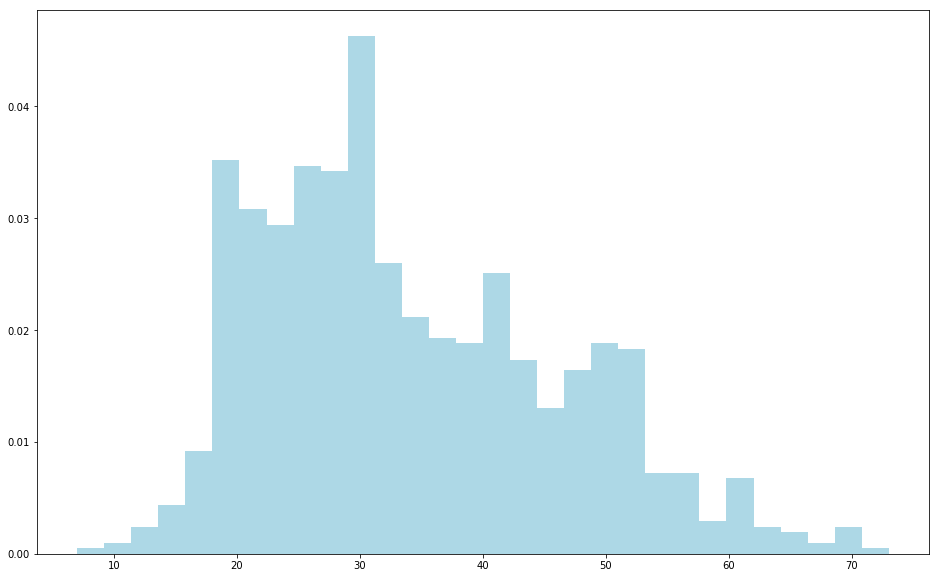

In [13]:
ages = user_fields.map(lambda x: int(x[1])).collect()
plt.hist(ages, bins=30, color='lightblue', normed=True)
fig = plt.gcf()
fig.set_size_inches(16, 10)
#plt.show()

In [14]:
#user_fields.map(lambda fields: (fields[3], 1)).collect()
#职业分布

In [15]:
user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x + y).collect()

[('other', 105),
 ('writer', 45),
 ('executive', 32),
 ('administrator', 79),
 ('student', 196),
 ('lawyer', 12),
 ('librarian', 51),
 ('homemaker', 7),
 ('engineer', 67),
 ('healthcare', 16),
 ('salesman', 12),
 ('technician', 27),
 ('educator', 95),
 ('scientist', 31),
 ('entertainment', 18),
 ('programmer', 66),
 ('artist', 28),
 ('marketing', 26),
 ('none', 9),
 ('retired', 14),
 ('doctor', 7)]

In [16]:
count_by_occupation = user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x + y).collect()
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])

In [17]:
print(x_axis1)
print(y_axis1)
print(np.argsort(y_axis1))

x=np.array(['hell9','hoeo4','jjos6'])
print(x)
y=[2,0,1]
x=x[y]
print(x)

['other' 'writer' 'executive' 'administrator' 'student' 'lawyer'
 'librarian' 'homemaker' 'engineer' 'healthcare' 'salesman' 'technician'
 'educator' 'scientist' 'entertainment' 'programmer' 'artist' 'marketing'
 'none' 'retired' 'doctor']
[105  45  32  79 196  12  51   7  67  16  12  27  95  31  18  66  28  26
   9  14   7]
[20  7 18  5 10 19  9 14 17 11 16 13  2  1  6 15  8  3 12  0  4]
['hell9' 'hoeo4' 'jjos6']
['jjos6' 'hell9' 'hoeo4']


In [18]:
x_axis = x_axis1[np.argsort(y_axis1)] #获取y_axis1数组的indices，并排序好输出
y_axis = y_axis1[np.argsort(y_axis1)]

In [19]:
pos = np.arange(len(x_axis))
print(pos)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


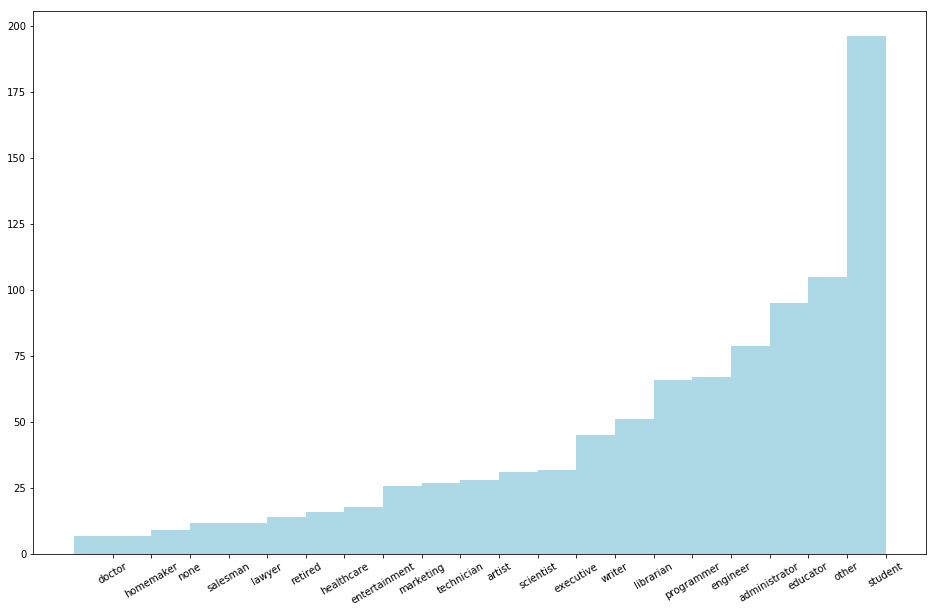

In [23]:
pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)
plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(16, 10)

In [25]:
count_by_occupation2 = user_fields.map(lambda fields: fields[3]).countByValue()
print("Map-reduce approach:")
print(dict(count_by_occupation2))
print("countByValue approach:")
print(dict(count_by_occupation))

Map-reduce approach:
{'technician': 27, 'other': 105, 'writer': 45, 'executive': 32, 'administrator': 79, 'student': 196, 'lawyer': 12, 'educator': 95, 'scientist': 31, 'entertainment': 18, 'programmer': 66, 'librarian': 51, 'homemaker': 7, 'artist': 28, 'engineer': 67, 'marketing': 26, 'none': 9, 'healthcare': 16, 'retired': 14, 'salesman': 12, 'doctor': 7}
countByValue approach:
{'other': 105, 'executive': 32, 'administrator': 79, 'student': 196, 'educator': 95, 'programmer': 66, 'homemaker': 7, 'artist': 28, 'engineer': 67, 'none': 9, 'retired': 14, 'doctor': 7, 'technician': 27, 'writer': 45, 'lawyer': 12, 'scientist': 31, 'entertainment': 18, 'librarian': 51, 'marketing': 26, 'healthcare': 16, 'salesman': 12}
